In [1]:
import numpy as np
import sys
sys.path.append('../../scripts/')
import scipy.special as sps

import matplotlib.pyplot as plt
import mpl_stylesheet
import matplotlib.lines as mlines
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt')

In [2]:
def gamma_pdf(x, shape, scale):
    res = x ** (shape - 1) * np.exp( - x / scale) / (sps.gamma(shape) * scale ** shape)
    return res 

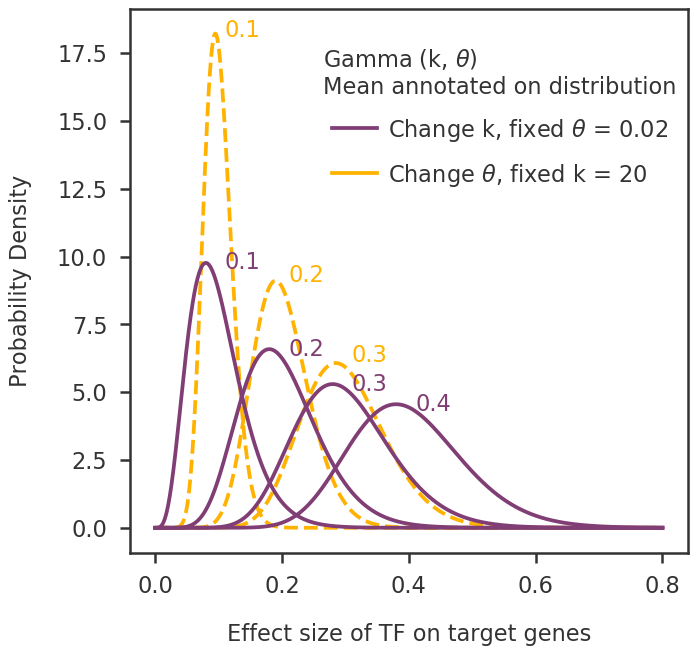

In [33]:
tftrans_shapes = [5, 10, 15, 20]
fix_scale = 0.02
tftrans_scales = [0.005, 0.01, 0.015]
fix_shape = 20
mcolors = {'shape': '#803E75', 
           'scale': '#FFB300'}
mvars = ['shape', 'scale']

fig = plt.figure()
ax1 = fig.add_subplot(111)

xvals = np.linspace(0, 0.8, 1000)
for gscale in tftrans_scales:
    yvals = gamma_pdf(xvals, fix_shape, gscale)
    ax1.plot(xvals, yvals, ls = 'dashed', color = mcolors['scale'], lw = 3)
    gmean = fix_shape * gscale
    xpos = gmean + 0.01
    ypos = np.max(yvals) + gmean
    ax1.text(xpos, ypos, f'{gmean}', ha='left', va='center', color = mcolors['scale'])
    
for gshape in tftrans_shapes:
    yvals = gamma_pdf(xvals, gshape, fix_scale)
    ax1.plot(xvals, yvals, ls = 'solid', color = '#803E75', lw = 3)
    gmean = fix_scale * gshape
    xpos = gmean + 0.01
    ypos = np.max(yvals)
    ax1.text(xpos, ypos, f'{gmean}', ha='left', va='center', color = mcolors['shape'])



#mlabels = [f'Variation in {x}' for x in mvars]
mlabels = [r'Change k, fixed $\theta$ = 0.02', r'Change $\theta$, fixed k = 20']
mhandles = [mlines.Line2D([], [], color = mcolors[x], lw = 3) for x in mvars]
legendtitle = r'Gamma (k, $\theta$)' +'\nMean annotated on distribution'
legend1 = ax1.legend(handles = mhandles, labels = mlabels, handlelength = 2,
                     loc = 'upper right', bbox_to_anchor = (1.0, 0.95), frameon = False, title = legendtitle)

ax1.set_xlabel('Effect size of TF on target genes')
ax1.set_ylabel('Probability Density')

plt.savefig('../plots/explore_tfstrength_distributions.png', bbox_inches='tight')
plt.show()